In [5]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Get the current directory path:
notebook_dir = os.path.abspath('')

# Construct the path to the data directory:
data_dir = os.path.join(notebook_dir, '../src/data')

# Add the data directory path to the system path:
sys.path.append(data_dir)

# Import the feature-building module:
import build_features


In [34]:
df = build_features.project_gdp(path_data='../data')

In [35]:
projection_arima = df[df.index < '2015-03-01']

In [ ]:
model = SARIMAX(projection_arima, order=(1, 1, 1), seasonal_order=(1, 1, 0, 4), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)
fitted = results.fittedvalues
predict = results.predict(start=pd.to_datetime('2015-03-01'),end=pd.to_datetime('2024-12-01'), dynamic=False)

In [40]:
df['predict'] = predict
df['fitted'] = fitted
df_plot = df[df.index > '2000-03-01']

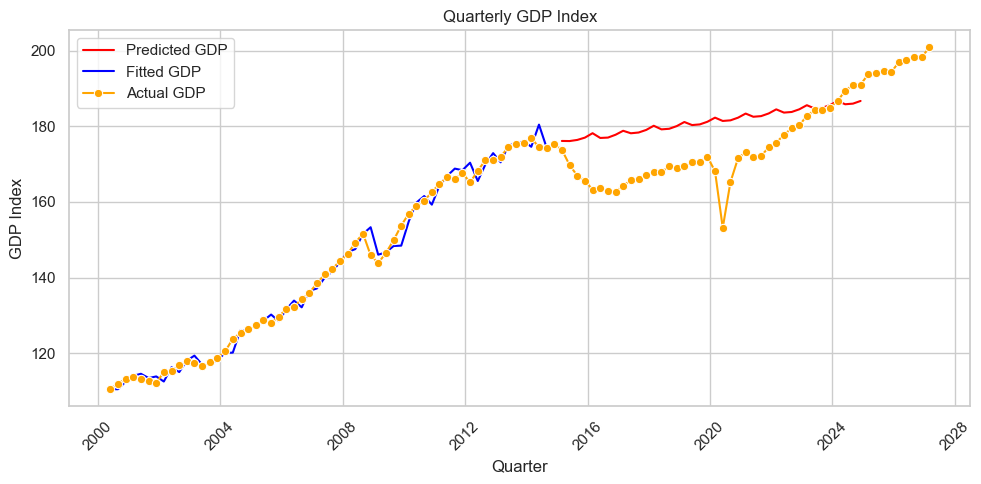

In [42]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Quarter', y='predict', data=df_plot, label='Predicted GDP', color='red')
sns.lineplot(x='Quarter', y='fitted', data=df_plot, label='Fitted GDP', color='blue')
sns.lineplot(x='Quarter', y='gdp', data=df_plot, marker='o', label='Actual GDP', color='orange')

plt.title('Quarterly GDP Index')
plt.xlabel('Quarter')
plt.ylabel('GDP Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()